In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set display options for DataFrame
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Function to style DataFrame with borders and hide index
def style_table(df):
    return df.style.set_table_styles([
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('border', '1px solid black')]},
        {'selector': 'th', 'props': [('border', '1px solid black'),
                                      ('background-color', '#40466e'),
                                      ('color', 'white'),
                                      ('text-align', 'center')]},
        {'selector': 'td', 'props': [('border', '1px solid black'),
                                      ('text-align', 'center')]},
        {'selector': '.row_heading', 'props': [('display', 'none')]},
        {'selector': '.blank', 'props': [('display', 'none')]}
    ])

# Load CSV files into DataFrames using the known comma delimiter
movies = pd.read_csv("/content/movies.csv", delimiter=',')
ratings = pd.read_csv("/content/ratings.csv", delimiter=',')

# Display the styled DataFrames
display(style_table(movies.head()))
display(style_table(ratings.head()))



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,296.000000,5.000000,1147880044.000000
1,1,306.000000,3.500000,1147868817.000000
2,1,307.000000,5.000000,1147868828.000000
3,1,665.000000,5.000000,1147878820.000000
4,1,899.000000,3.500000,1147868510.000000


<ipython-input-16-965170168cd8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings['rating'], y=top_movies['title'], palette="viridis", ax=axs[0])


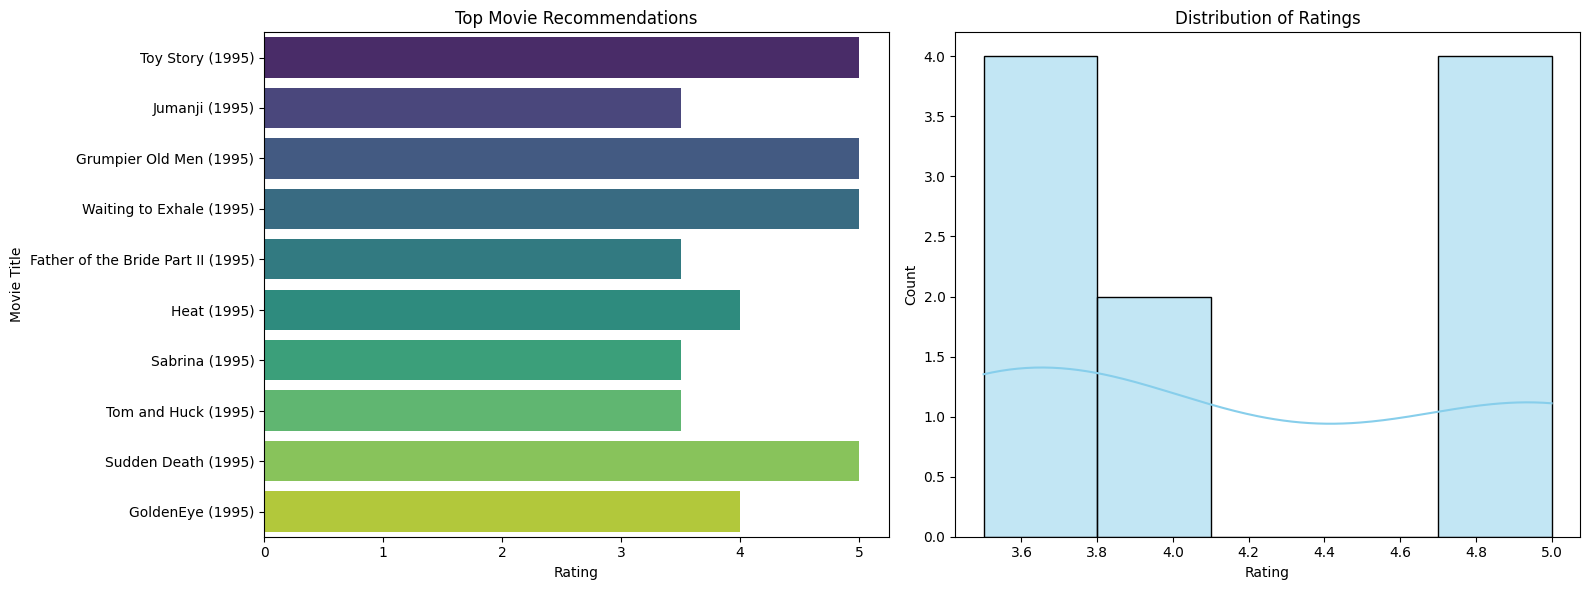

In [16]:
# Create subplots: one for the horizontal bar chart and one for the histogram
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Subplot 1: Horizontal bar chart for movie recommendations (using ratings and movie titles)
# Make sure that 'ratings' and 'movies' are pre-defined DataFrames
top_movies = movies.head(10)  # Adjust as needed
top_ratings = ratings.head(10)  # Adjust as needed

sns.barplot(x=top_ratings['rating'], y=top_movies['title'], palette="viridis", ax=axs[0])
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Movie Title")
axs[0].set_title("Top Movie Recommendations")

# Subplot 2: Histogram of ratings distribution
sns.histplot(top_ratings['rating'], bins=5, kde=True, color="skyblue", ax=axs[1])
axs[1].set_xlabel("Rating")
axs[1].set_title("Distribution of Ratings")

plt.tight_layout()
plt.show()

In [ ]:
movies.isnull().count()
ratings.isnull().count()

,0
userId,656746
movieId,656746
rating,656746
timestamp,656746


In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 11.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505173 sha256=a2441e79cd7e20ee083a57854a16253a01c30c207d29a46f15a5ab16fcd2c5e2
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
# Define the reader with the rating scale (adjust if necessary)
reader = Reader(rating_scale=(ratings['rating'].min(), ratings['rating'].max()))

# Load the dataset from the DataFrame (only need userId, movieId, rating)
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialize the SVD algorithm and train it
algo = SVD()
algo.fit(trainset)

# Evaluate the model on the test set using RMSE
predictions = algo.test(testset)
print("Test RMSE:", accuracy.rmse(predictions))

# Generate recommendations for a specific user (e.g., user with ID 1)
user_id = 1

# Get all unique movie IDs from the movies dataset
all_movie_ids = movies['movieId'].unique()

# Find movies that the user hasn't rated yet
user_rated = ratings[ratings['userId'] == user_id]['movieId'].tolist()
movies_to_predict = [mid for mid in all_movie_ids if mid not in user_rated]

# Predict ratings for movies the user hasn't rated
predictions = [algo.predict(user_id, mid) for mid in movies_to_predict]

# Sort predictions by estimated rating in descending order and select top 10
predictions.sort(key=lambda x: x.est, reverse=True)
top_n = predictions[:10]

print(f"\nTop recommendations for user {user_id}:")
for pred in top_n:
    # Get the movie title from the movies DataFrame
    movie_title = movies[movies['movieId'] == pred.iid]['title'].values[0]
    print(f"Movie: {movie_title}, Predicted Rating: {pred.est:.2f}")


RMSE: 1.7985
Test RMSE: 1.7985301489305385

Top recommendations for user 1:
Movie: Toy Story (1995), Predicted Rating: 5.00
Movie: Jumanji (1995), Predicted Rating: 5.00
Movie: Grumpier Old Men (1995), Predicted Rating: 5.00
Movie: Waiting to Exhale (1995), Predicted Rating: 5.00
Movie: Father of the Bride Part II (1995), Predicted Rating: 5.00
Movie: Heat (1995), Predicted Rating: 5.00
Movie: Sabrina (1995), Predicted Rating: 5.00
Movie: Tom and Huck (1995), Predicted Rating: 5.00
Movie: Sudden Death (1995), Predicted Rating: 5.00
Movie: GoldenEye (1995), Predicted Rating: 5.00
